# High-pass filter with RC circuit

Source: https://notebook.community/mholtrop/Phys605/Python/Signal/RC_Filters_in_Python

In [1]:
1j*1j

(-1+0j)

In [2]:
import matplotlib.pyplot as plt
import numpy as np
def Filter(f,R,C):                     # Define the Filter function that corresponds to the high pass RC filter.
    omega = 2*np.pi*f
    # vout=( 1./(1j*R*omega*C+1.))
    vout = 1j*R*omega*C / (1 + 1j*R*omega*C)
    return(vout)

Filter cut off frequency is:  159.15 Hz


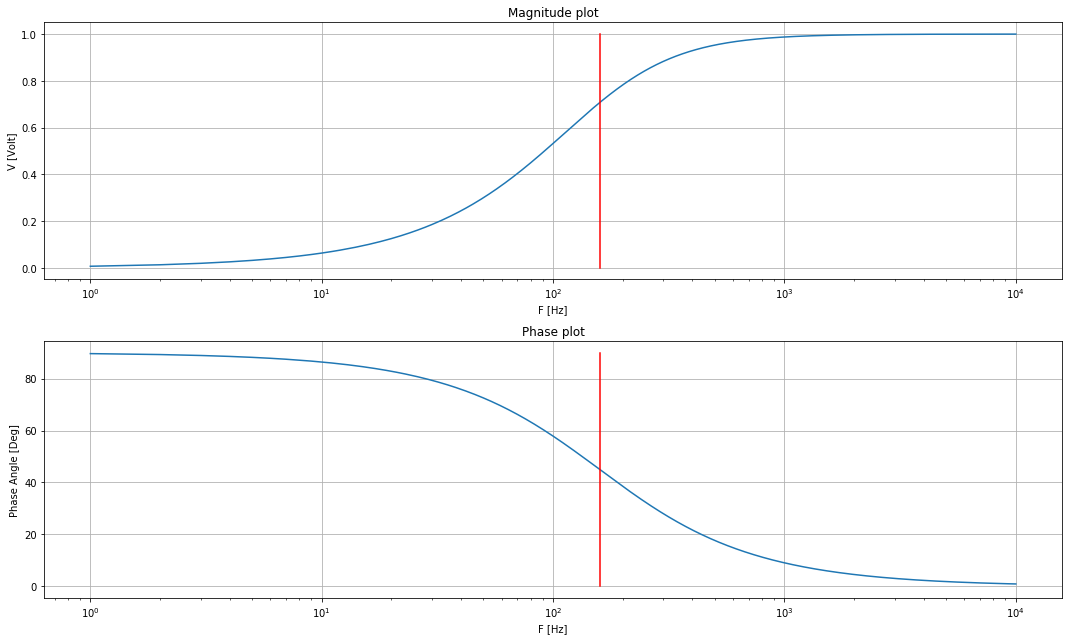

In [3]:
f = np.linspace(1,10000,10000)
R=1000. # 1kOhm
C=1.e-6  # 1µF
vout_c = Filter(f,R,C)
F_cut = 1./(2.*np.pi*R*C)
print("========================================")
print("Filter cut off frequency is: {:7.2f} Hz".format(F_cut))
print("========================================")
plt.figure(figsize=(15,9)) # Make a figure, and make it bigger.
plt.subplot(2,1,1)         # First subplot in the figure with (2 columns, 1 row, 1st subplot)
plt.plot(f,np.abs(vout_c)) # Plot the amplitude, the absolute of the complex number
plt.plot([F_cut,F_cut],[0,1],color="red",label="Cut off frequency")  # plot a line for the filter cut frequency
plt.title("Magnitude plot")
plt.xlabel("F [Hz]")
plt.ylabel("V [Volt]")
plt.xscale("log")           # Set x to a log scale
plt.grid(True)
plt.subplot(2,1,2)
plt.plot(f,np.degrees(np.angle(vout_c))) # Plot the phase, the angle of the complex number
plt.plot([F_cut,F_cut],[0,90],color="red",label="Cut off frequency")  # plot a line for the filter cut frequency
plt.title("Phase plot")
plt.xlabel("f [Hz]")
plt.ylabel("Phase Angle [Deg]")
plt.xscale("log")
plt.grid(True)
plt.tight_layout()          # Automatically adjust spacing between the 2 plots so they do not overlap
plt.show()

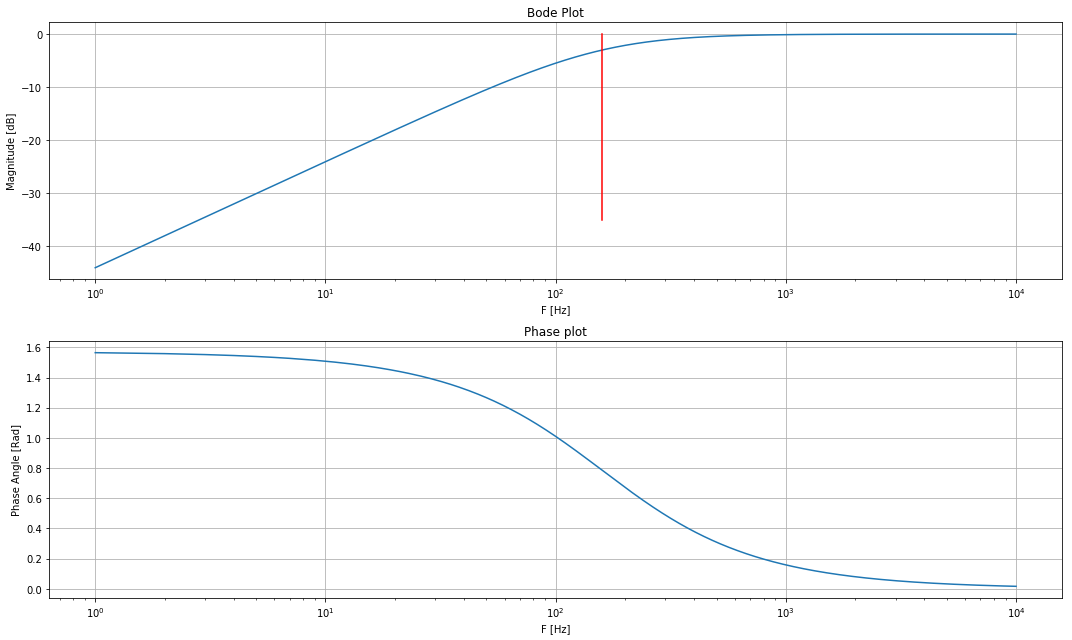

In [4]:
y_db = 20*np.log10(np.abs(vout_c))
plt.figure(figsize=(15,9)) # Make a figure, and make it bigger.
plt.subplot(2,1,1)         # First subplot in the figure with (2 columns, 1 row, 1st subplot)
plt.plot(f,y_db) # Plot the amplitude, the absolute of the complex number
plt.plot([F_cut,F_cut],[0,-35],color="red",label="Cut off frequency")  # plot a line for the filter cut frequency
plt.title("Bode Plot")
plt.xlabel("F [Hz]")
plt.ylabel("Magnitude [dB]")
plt.xscale("log")           # Set x to a log scale
plt.grid(True)
plt.tight_layout()          # Automatically adjust spacing between the 2 plots so they do not overlap
plt.subplot(2,1,2)
plt.plot(f,np.angle(vout_c)) # Plot the amplitude, the absolute of the complex number
plt.title("Phase plot")
plt.xlabel("F [Hz]")
plt.ylabel("Phase Angle [Rad]")
plt.xscale("log")
plt.grid(True)
plt.tight_layout()          # Automatically adjust spacing between the 2 plots so they do not overlap
plt.show()

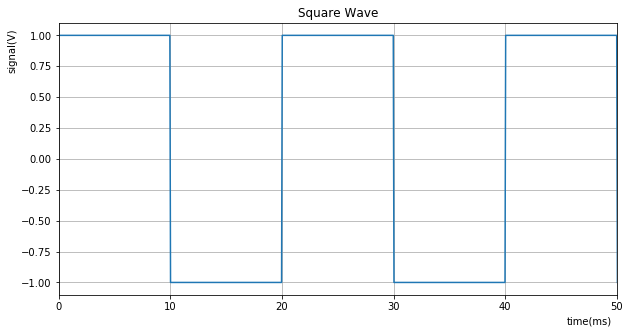

In [5]:
from scipy.fftpack import fft, ifft, fftfreq, fftshift
from scipy import signal
F = 50.
T = 2.
N = 2**15                         # You can do FFTs over any number, but 2^N (2**N) is *a lot* faster!
DT = T/N
t = np.linspace(0.,T,N)
y_sq = signal.square(2*np.pi*F*t) # Create a square wave wiht a 2 Volt peak to peak (-1V to +1V)
plt.figure(figsize=(10,5))
plt.plot(1000*t,y_sq)             # Change the x-axis scale to ms by multiplying by 10^3
ax = plt.gca()
ax.set_xlim(0.,50.)               # Show only the first 50 ms of the signal
plt.grid(True)
plt.title("Square Wave")
plt.xlabel("time(ms)",position=(0.95,1))
plt.ylabel("signal(V)",position=(1,0.9))
plt.show()

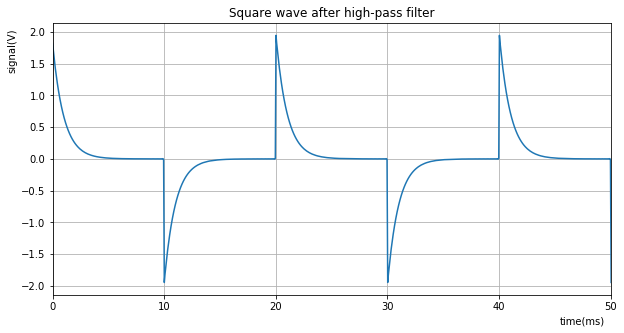

In [6]:
f_fft = fftfreq(N,DT)
y_sq_fft = fft(y_sq)
y_sq_fft_out = y_sq_fft*Filter(f_fft,R,C)
y_sq_out = ifft(y_sq_fft_out)
plt.figure(figsize=(10,5))
plt.plot(1000*t,np.real(y_sq_out))
ax = plt.gca()
ax.set_xlim(0.,50.)               # Show only the first 50 ms of the signal
plt.grid(True)
plt.title("Square wave after high-pass filter")
plt.xlabel("time(ms)",position=(0.95,1))
plt.ylabel("signal(V)",position=(1,0.9))
plt.show()